Este código se baja en la guía de tensorflow para obtener un clasificador de imagenes
Para más referencias:
https://www.tensorflow.org/tutorials/images/classification?hl=es

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tqdm import tqdm
from os import listdir
from random import randint

Las clases a entrenar son: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'frogs', 'horse', 'sheep', 'spider', 'squirrel']
Cantidad de imagenes de entrenamiento: 8098
800


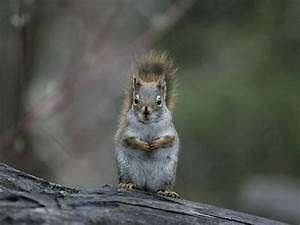

In [60]:
#Para los datos de entrenamiento

path_train = '../animal_classifier/dataset/train'
dir_list_train = listdir(path_train)
print('Las clases a entrenar son: ' + str(dir_list_train))

#Windows Path:
data_dir_train = pathlib.Path(path_train)

image_count_train = len(list(data_dir_train.glob('*/*.jpeg'))) +  len(list(data_dir_train.glob('*/*.jpg')))
print('Cantidad de imagenes de entrenamiento: ' + str(image_count_train))

#Direcciones de las imagenes de las diferentes clases

butterfly_train_path = list(data_dir_train.glob('butterfly/*'))
cat_train_path = list(data_dir_train.glob('cat/*'))
chicken_train_path = list(data_dir_train.glob('chicken/*'))
cow_train_path = list(data_dir_train.glob('cow/*'))
dog_train_path = list(data_dir_train.glob('dog/*'))
elephant_train_path = list(data_dir_train.glob('elephant/*'))
frogs_train_path = list(data_dir_train.glob('frogs/*'))
horse_train_path = list(data_dir_train.glob('horse/*'))
sheep_train_path = list(data_dir_train.glob('sheep/*'))
spider_train_path = list(data_dir_train.glob('spider/*'))
squirrel_train_path = list(data_dir_train.glob('squirrel/*'))
print(len(squirrel_train_path))

PIL.Image.open(str(squirrel_train_path[randint(0, len(squirrel_train_path))]))



Las clases de validación son: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'frogs', 'horse', 'sheep', 'spider', 'squirrel']
Cantidad de imagenes de entrenamiento: 2108


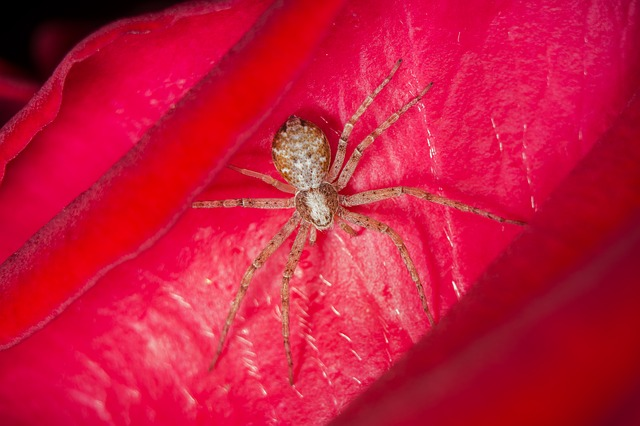

In [59]:
#Para los datos de validación

path_val = '../animal_classifier/dataset/validate'
dir_list_val = listdir(path_val)
print('Las clases de validación son: ' + str(dir_list_val))

#Windows Path:
data_dir_val = pathlib.Path(path_val)

image_count = len(list(data_dir_val.glob('*/*.jpeg'))) +  len(list(data_dir_val.glob('*/*.jpg')))
print('Cantidad de imagenes de entrenamiento: ' + str(image_count))

#Direcciones de las imagenes de las diferentes clases

butterfly_val_path = list(data_dir_val.glob('butterfly/*'))
cat_val_path = list(data_dir_val.glob('cat/*'))
chicken_val_path = list(data_dir_val.glob('chicken/*'))
cow_val_path = list(data_dir_val.glob('cow/*'))
dog_val_path = list(data_dir_val.glob('dog/*'))
elephant_val_path = list(data_dir_val.glob('elephant/*'))
frogs_val_path = list(data_dir_val.glob('frogs/*'))
horse_val_path = list(data_dir_val.glob('horse/*'))
sheep_val_path = list(data_dir_val.glob('sheep/*'))
spider_val_path = list(data_dir_val.glob('spider/*'))
squirrel_val_path = list(data_dir_val.glob('squirrel/*'))


PIL.Image.open(str(spider_val_path[randint(0, len(spider_val_path))]))

In [76]:
#Preparar datos 

batch_size = 32
img_height = 180
img_width = 180

#Entrenamiento
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names_train = train_ds.class_names
print('Clases de entrenamiento: ' + str(class_names_train))

#Validación

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_val,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names_val = val_ds.class_names
print('Clases de validación: ' + str(class_names_val))

Found 8116 files belonging to 11 classes.
Clases de entrenamiento: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'frogs', 'horse', 'sheep', 'spider', 'squirrel']
Found 2116 files belonging to 11 classes.
Clases de validación: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'frogs', 'horse', 'sheep', 'spider', 'squirrel']


(32, 180, 180, 3)
(32,)


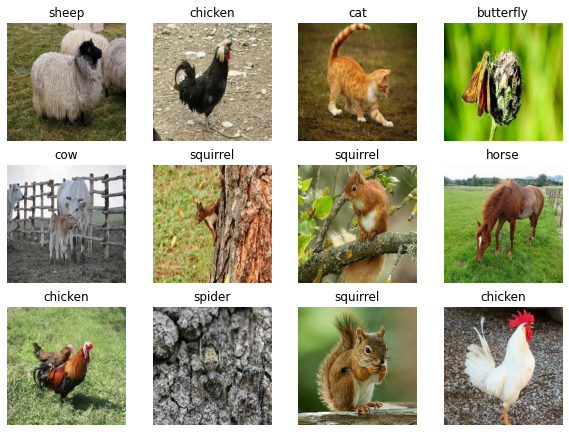

In [71]:
#Revisar las imagenes:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names_train[labels[i]])
        plt.axis("off")
    
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

In [73]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [79]:
#Se crea el modelo:

num_classes = len(class_names_train)
print('El número de clases son: ' + str(num_classes))

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


El número de clases son: 11


In [82]:
#Se entrena el modelo

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Resumen de nuestro modelo
model.summary()

#Entrenamineto:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

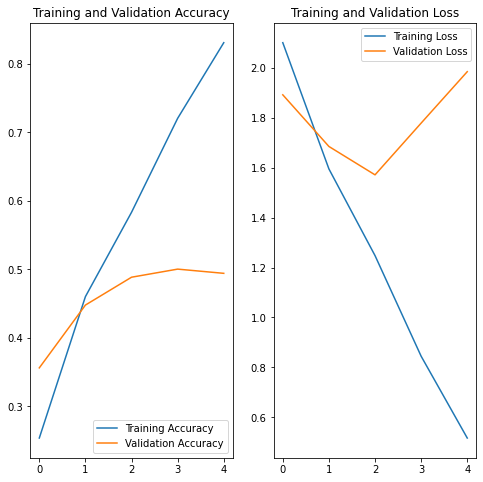

In [83]:
#Resultados

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()